# Big Data for Biologists: Decoding Genomic Function- Class 8

## How do you visualize similarities and differences of gene expression profiles across cell types? Part II

##  Learning Objectives
***Students should be able to***
 <ol>
 <li> <a href=#MetaData>Load RNA-Seq metadata for the physiological system of a cell type into Python</a></li> 
 <li> <a href=#BinaryIndex>Use binary indexing to select elements from a dataframe. </a></li>
 <li> <a href=#PCA1>Describe what Principal Component analysis is and how it can be used to analyze and visualize variation in large datasets</a></li>
 <li> <a href=#PCA2>Perform prinicipal component analysis to identify clustering patterns in gene expression data </a></li>
 <li> <a href=#Scatter>Make a scatter plot of the output from principal component analysis</a></li> 

# Load RNA-Seq metadata for the physiological system of a cell type into Python<a name='MetaData' />

In [37]:
%load_ext autoreload
# load the pandas package and define an abbreviation (or alias) 
import pandas as pd   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will focus our analysis on 4 of the anatomical structures and check for differential gene expression among them.  


In [38]:
#Read in the metadata table. 
metadata = pd.read_table(
     filepath_or_buffer='../datasets/RNAseq/rnaseq_metadata.txt', 
     header=0,
    index_col=0)

In [39]:
# Read in the RNA-seq data matrix. 
rnaseq_data = pd.read_table(
     filepath_or_buffer='../datasets/RNAseq/rnaseq_normalized.tsv', 
     header=0,
     index_col=0)

In [40]:
print("Number rows:"+str(rnaseq_data.shape[0]))#prints number of rows -- this is the sample
print("Number columns:"+str(rnaseq_data.shape[1]))#prints number of columns -- this is the gene axis

Number rows:57820
Number columns:410


In [41]:
#Since our goal is to identify genes that are differentially expressed across organ systems, we 
# want to exclude genes that have expression = 0 in all 4 of the organ systems. 
rnaseq_data_subset=rnaseq_data[rnaseq_data.sum(axis=1)>0]


In [42]:
print("Number rows:"+str(rnaseq_data_subset.shape[0]))#prints number of rows -- this is the sample
print("Number columns:"+str(rnaseq_data_subset.shape[1]))#prints number of columns -- this is the gene axis

Number rows:55667
Number columns:410


In [43]:
#Transpose the data frame 
#Now, our features (genes) are along the column axis, and sample names are along the row axis. This will make for easier
#downstream analysis. 
rnaseq_data_subset=rnaseq_data_subset.transpose()

In [44]:
print("Number rows:"+str(rnaseq_data_subset.shape[0]))#prints number of rows -- this is the gene axis 
print("Number columns:"+str(rnaseq_data_subset.shape[1]))#prints number of columns

Number rows:410
Number columns:55667


In [45]:
#merge the rnaseq_subset dataframe with the metadata frame so we can more easily sub-select the organ systems 
#of interst.

merged_df=pd.merge(rnaseq_data_subset, metadata, left_index=True,right_index=True)
merged_df.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,1.44,46.45,0.27,45.71,0.0,0.0,8.71,0.0,6.99,0.10,...,10.73,0.32,0.0,0.21,55.10,2.47,0.00,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.02,1.85,0.30,1.25,0.0,0.0,0.13,0.0,1.42,0.34,...,3.38,0.05,0.0,0.01,3.45,0.39,0.02,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.12,19.95,0.00,28.88,0.0,0.0,0.94,0.0,4.48,0.04,...,11.65,0.14,0.0,0.03,35.39,0.99,0.00,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,1.41,9.46,0.00,7.91,0.0,0.0,5.42,0.0,12.92,0.00,...,20.00,0.00,0.0,0.27,34.78,0.63,0.00,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.00,2.67,0.00,0.09,0.0,0.0,0.00,0.0,3.32,0.22,...,11.45,0.00,0.0,0.03,10.25,0.11,0.00,Blood,Blood,Leukemia


In [46]:
#Define the systems of interest
systems_subset=["Blood","Embryonic","Immune","Respiratory"]

In [47]:
#Pick out the samples (rows) in the merged dataframe that contain the samples from the systems of interest 
samples_to_keep=merged_df['System'].isin(systems_subset)
samples_to_keep.head()

ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello    False
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                              False
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                  True
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                             False
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                        True
Name: System, dtype: bool

In [48]:
#Select the rows in the data matrix that contain the samples we wish to analyze (i.e. the samples
#from blood, embryonic, immune, and)
merged_df_subset=merged_df[samples_to_keep]

In [49]:
merged_df_subset.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.12,19.95,0.0,28.88,0.0,0.0,0.94,0.0,4.48,0.04,...,11.65,0.14,0.0,0.03,35.39,0.99,0.0,Embryonic,Trophoblast,ES.derived
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.00,2.67,0.0,0.09,0.0,0.0,0.00,0.0,3.32,0.22,...,11.45,0.00,0.0,0.03,10.25,0.11,0.0,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,0.60,2.25,0.0,29.66,0.0,0.0,0.04,0.0,7.60,0.00,...,7.52,0.00,0.0,0.04,10.64,4.88,0.0,Blood,Blood,Lymphoblastoid
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,0.05,1.16,0.0,0.03,0.0,0.0,0.00,0.0,1.60,0.00,...,0.31,0.00,0.0,0.00,10.83,0.11,0.0,Blood,Blood,HSC
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Primary_Cells.CSHL_Gingeras,0.00,2.55,0.0,8.60,0.0,0.0,0.00,0.0,7.04,0.00,...,11.91,0.00,0.0,0.05,21.88,0.60,0.0,Respiratory,Lung,Smooth


In [50]:
#Check row & column numbers in merged_df_subset 
print("Number rows:"+str(merged_df_subset.shape[0]))#prints number of rows -- this is the sample axis
print("Number columns:"+str(merged_df_subset.shape[1]))# prints the number of columns -- this is the gene axis 

Number rows:94
Number columns:55670


## Programming tip:Using binary indexing to select elements from a dataframe. <a name='BinaryIndex'/>
In the code above we needed to select the rows in rnaseq_data_subset that sum to a value greater than 0. To do this, we executued the line of code: 

```
rnaseq_data=rnaseq_data[rnaseq_data.sum(axis=1)>0]

```
Let's break down what this line of code is doing. 
First, we find all rows in `rnaseq_data` that have sum greater than 0. 

In [51]:
nonzero_rows=rnaseq_data.sum(axis=1)>0
print(nonzero_rows)

Gene
ENSG00000242268.2      True
ENSG00000167578.12     True
ENSG00000270112.2      True
ENSG00000078237.4      True
ENSG00000263642.1      True
ENSG00000225275.4      True
ENSG00000269416.1      True
ENSG00000268332.1      True
ENSG00000060642.6      True
ENSG00000231981.3      True
ENSG00000201788.1     False
ENSG00000019995.6      True
ENSG00000167700.4      True
ENSG00000172137.14     True
ENSG00000240423.1      True
ENSG00000271616.1      True
ENSG00000234881.1      True
ENSG00000236040.1      True
ENSG00000231105.1      True
ENSG00000182141.5      True
ENSG00000136895.14     True
ENSG00000270677.1      True
ENSG00000264981.1      True
ENSG00000197557.6      True
ENSG00000233540.1      True
ENSG00000252650.1      True
ENSG00000102174.7      True
ENSG00000271647.1      True
ENSG00000232001.1      True
ENSG00000166391.10     True
                      ...  
ENSG00000264995.1      True
ENSG00000264491.1      True
ENSG00000146587.13     True
ENSG00000173930.8      True
ENSG00000135094

Note that `rnaseq_data.sum(axis=1)>0` returns a value of "True" or "False" at each row in the`rnaseq_data` matrix. This is referred to as binary indexing. 

Next, we identify the rows with a value of "True", and select them from `rnaseq_data`. 
This can be done with the command: 

In [52]:
rnaseq_data_subset=rnaseq_data[nonzero_rows]

We have extracted RNA-seq expression data for our four organ systems of interest. We have also removed all genes that are not expressed in any of the four organ systems.

## What is principal component analysis (PCA)? <a name='PCA1' />

Principal component analysis (PCA) is a statistical method to understand and visualize variation in large datasets.

In [53]:
from IPython.display import HTML
HTML('<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vRcZ3RiXYbwH_xrE-261ccJT71HKZ5oPJqmIATdHa2SwvDekvAR5Lr7zDwnNPN88FAEM2XT-F6-DHiS/embed?start=false&loop=false&delayms=60000" frameborder="0" width="960" height="749" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>')

We will use the [scikit learn](http://scikit-learn.org/stable/) python library to perform principal component analysis. We import scikit learn with the command "import sklearn". This library has a number of built-in tools for performing statistical analysis and machine learning. 

[This tutorial](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) provides a guide to performing PCA analysis with scikit learn.

In [54]:
# Perform principal component analysis on the data to check for clustering patterns
from sklearn.decomposition import PCA as sklearnPCA

#We decompose the data into 10 principal components 
sklearn_pca = sklearnPCA(n_components=10)
#We want to exclude the metadata columns from the PCA transformation -- they have served their purpose in helping 
#us filter the dataset to the organ systems of interest, and now we remove them. 
metadata_subset=merged_df_subset[['System','Organ','CellType']]
merged_df_subset = merged_df_subset.drop(['System', 'Organ','CellType'], axis=1)

pca_results = sklearn_pca.fit_transform(merged_df_subset)


In [55]:
merged_df_subset.shape
metadata_subset.shape

(94, 3)

We visualize the percent of variance explained by each principal component in a graph called a "scree plot"

In [56]:
#We use our plotly helper functions to generate a scree plot from the principal component analysis. 
#Import the plotting helper functions from the helpers directory
from plotnine import * 


In [57]:
print(sklearn_pca.explained_variance_ratio_)

[0.82401268 0.04420105 0.03395945 0.02801859 0.01615428 0.01046067
 0.00972885 0.00775569 0.00563336 0.00467087]


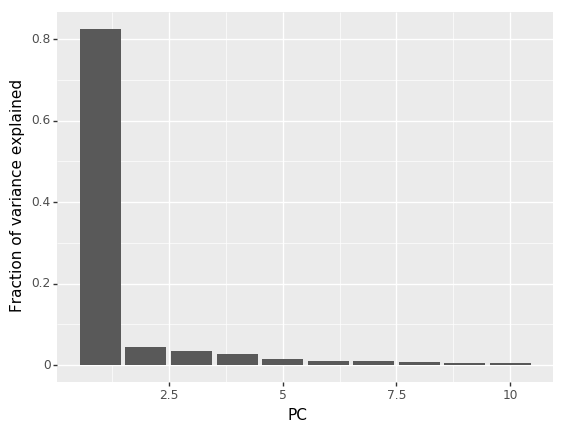

<ggplot: (-9223363293712733822)>

In [58]:
#We use the plotnine plotting library to generate a scree plot of the variance explained by each component
#Now, we create a barplot with just our 4 organ systems of interest 
y=sklearn_pca.explained_variance_ratio_
x=range(1,len(y)+1)
qplot(x=x,
      y=y,
      geom="bar",
      stat="identity",
      xlab="PC",
      ylab="Fraction of variance explained")

This indicates that the first principal component explain 82% of the variance in the data, while the second principal component explains 4% of the variance. 

In [59]:
pca_results[0:10]

array([[-1.14513514e+05, -1.43290407e+03, -1.13310145e+04,
        -1.00470043e+04,  2.07097039e+04,  3.28536429e+03,
         8.18228251e+02, -4.66904235e+03, -6.03483134e+03,
        -1.31733412e+04],
       [ 1.45919784e+05,  1.95823748e+04,  2.26942184e+04,
         8.24913181e+04,  5.22118128e+03,  7.20693089e+03,
         6.55417184e+03, -3.31737952e+04,  8.47357861e+02,
         4.05741960e+03],
       [-1.17733604e+05, -2.29150074e+03, -1.63583640e+04,
        -1.51751745e+04,  3.17288199e+04,  6.47463274e+03,
         4.26455581e+02, -1.34429403e+04, -2.02079654e+04,
        -4.90166733e+04],
       [ 4.20260715e+05, -2.30963624e+04,  2.89553142e+04,
         9.94876762e+04,  2.17998453e+04, -3.16667004e+04,
         3.77396228e+04, -6.85897231e+04, -2.37576534e+04,
         9.36622152e+03],
       [ 2.86374560e+05,  7.70937640e+04, -2.06754756e+04,
        -3.76849768e+04, -6.03328370e+03,  1.31271108e+04,
        -1.12413476e+04,  1.34844640e+04, -6.28894396e+03,
         6.

In [60]:
print(pca_results.shape)


(94, 10)


In [61]:
print (type(pca_results))

<class 'numpy.ndarray'>


## Make a scatter plot of the output from principal component analysis <a name='Scatter' />

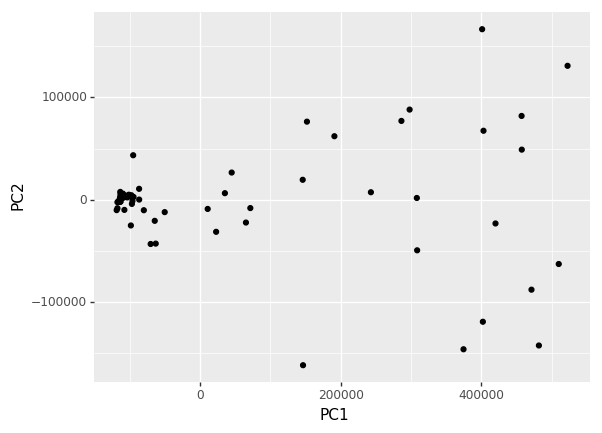

<ggplot: (8743164355918)>

In [62]:
#We make a scatterplot of PC1 vs PC2 
x=pca_results[:,0]
y=pca_results[:,1]
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2")

To investigate whether there is any clustering of samples by organ system, we can color-code by the 'System' column from the metadata table.

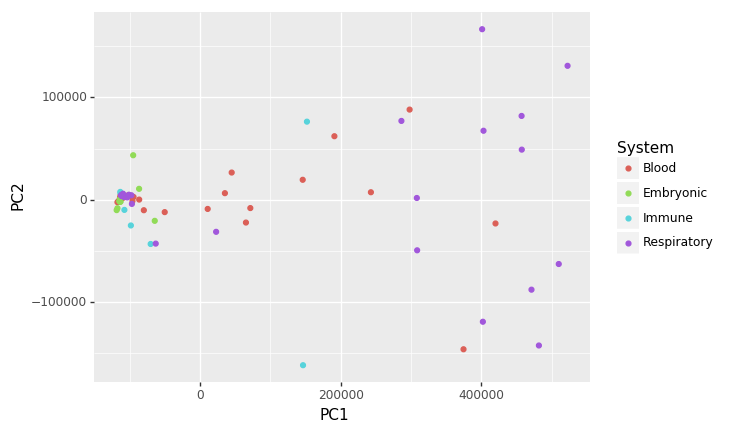

<ggplot: (8743142191126)>

In [70]:
qplot(x=x,
      y=y,
      geom="point",
      xlab="PC1",
      ylab="PC2",
      color=list(metadata_subset['System']))+scale_color_discrete(name="System")

In [ ]:
#Make a scatter plot of principle component 2 (PC2) vs principle component 3 (PC3)
#Make sure to change your axes labels too!

##ANSWER## 

In [ ]:
#Make a scatter plot of principle component 1 (PC1) vs principle component 3 (PC3)
#Make sure to change your axes labeles too!

##ANSWER## 